In [140]:
import pandas as pd

In [141]:
Netflix_Data = pd.read_csv('titles.csv')

In [142]:
Netflix_Data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# Estructura del data-set

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

id: The title ID on JustWatch.

title: The name of the title.

type: TV show or movie. 

description: A brief description.

release_year: The release year. (año de lanzamiento)

age_certification: The age certification. (la calificación de edad)

runtime: The length of the episode (SHOW) or movie. (el nº de episiodios (show), el tiempo de durancion en minutos (movie))

genres: A list of genres.

production_countries: A list of countries that produced the title.

seasons: Number of seasons if it's a SHOW.

imdb_id: The title ID on IMDB.

imdb_score: Score on IMDB. (puntuacion en IMDB)

imdb_votes: Votes on IMDB. (nº de votos en IMDB)

tmdb_popularity: Popularity on TMDB.

tmdb_score: Score on TMDB. (puntiaccion en TMDB)

# Preprocesado de datos

Meter cosas de preprocesado: tratamiento de NA's, categorizacion de cuantis, dummificacion de categoricas, conversion a formato estandar de categoricas, escalado, cambio de type etc

## Numero de filas y columnas

In [143]:
Netflix_Data.shape

(5850, 15)

## info() method

In [144]:
Netflix_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

Nos da el nombre de las columnas, el numero de valores no nulos y el type de las variables

## Proporcion de valores faltantes por columna:

In [145]:
Prop_NA = Netflix_Data.isnull().sum() / len(Netflix_Data)

Prop_NA

id                      0.000000
title                   0.000171
type                    0.000000
description             0.003077
release_year            0.000000
age_certification       0.447692
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
seasons                 0.640000
imdb_id                 0.068889
imdb_score              0.082393
imdb_votes              0.085128
tmdb_popularity         0.015556
tmdb_score              0.053162
dtype: float64

## Seleccionar todas las filas que no tienen NaN

## Seleccionar todas las filas que no tienen NaN en cierta columna/s

# Resumen Estadístico Descriptivo Básico <a class="anchor" id="9"></a>

Descripción breve de las cuantitativas:

In [146]:
Netflix_Data.describe() # include='all' para dar un tratamiento diferente a las categoricas que a las cuantitativas

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


Descripción breve de las categoricas:

In [147]:
Netflix_Data.loc[: , ['title', 'description', 'age_certification', 'genres', 'production_countries' ]].describe()

,title,description,age_certification,genres,production_countries
count,5849,5832,3231,5850,5850
unique,5798,5829,11,1726,452
top,The Gift,Five families struggle with the ups and downs ...,TV-MA,['comedy'],['US']
freq,3,2,883,484,1959


### 4.3.3. Análisis gráfico variables cuantitativas <a class="anchor" id="10"></a>

#### 4.3.3.1. Histogramas para las variables cuantitativas <a class="anchor" id="11"></a>

In [148]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

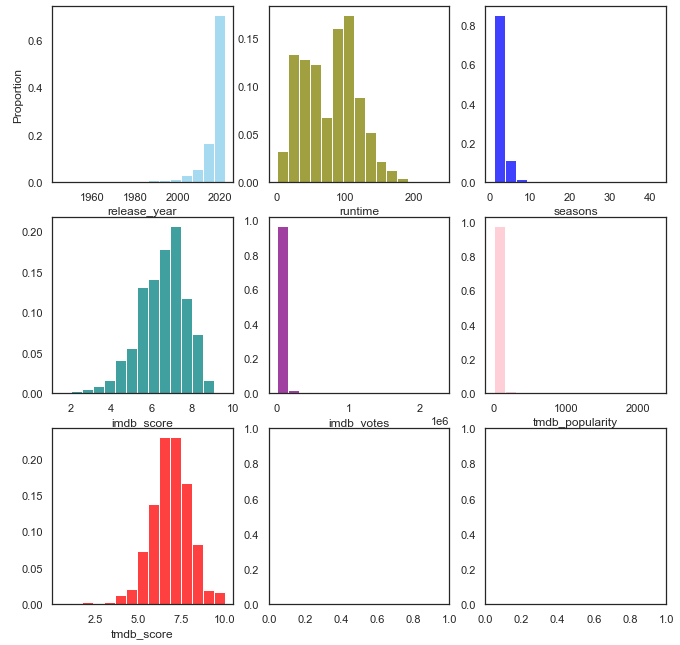

In [149]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue", ax=axs[0, 0])
 

p2 = sns.histplot(data=Netflix_Data, x="runtime", stat="proportion", bins=15, color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
 

p3 = sns.histplot(data=Netflix_Data, x="seasons", stat="proportion", bins=15, color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
 

p4 = sns.histplot(data=Netflix_Data, x="imdb_score", stat="proportion", bins=15, color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
 

p5 = sns.histplot(data=Netflix_Data, x="imdb_votes", stat="proportion", bins=15, color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
 

p6 = sns.histplot(data=Netflix_Data, x="tmdb_popularity", stat="proportion", bins=15, color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
 
 
p7 = sns.histplot(data=Netflix_Data, x="tmdb_score", stat="proportion", bins=15, color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
 
fig.savefig('p1.png', format='png', dpi=1200)

plt.show()

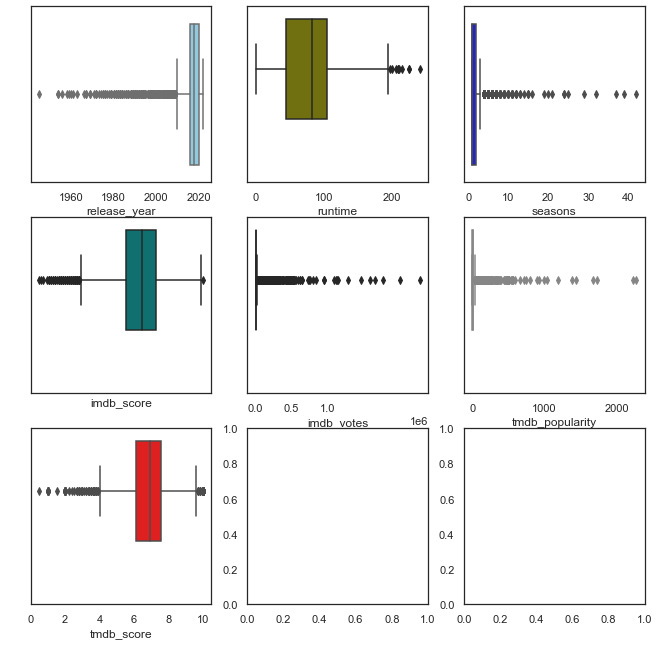

In [150]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue", ax=axs[0, 0])
 

p2 = sns.boxplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
p2.set_xticks( range(int(Netflix_Data['runtime'].min()) , int(Netflix_Data['runtime'].max()) , 100) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p3 = sns.boxplot(data=Netflix_Data, x="seasons", color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
 

p4 = sns.boxplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
p4.set_xticks( range(int(Netflix_Data['imdb_score'].min()) , int(Netflix_Data['imdb_score'].max()) , 300) )
p4.set_yticks( np.arange(0, 1, 0.1)  )

p5 = sns.boxplot(data=Netflix_Data, x="imdb_votes", color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
p5.set_xticks( range(int(Netflix_Data['imdb_votes'].min()) , int(Netflix_Data['imdb_votes'].max()/2) , 500000) )
p5.set_yticks( np.arange(0, 1, 0.1)  )

p6 = sns.boxplot(data=Netflix_Data, x="tmdb_popularity", color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
p6.set_xticks( range(int(Netflix_Data['tmdb_popularity'].min()) , int(Netflix_Data['tmdb_popularity'].max()+1) , 1000) )
p6.set_yticks( np.arange(0, 1, 0.1)  )
 
p7 = sns.boxplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 2) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

fig.savefig('p2.png', format='png', dpi=1200)

plt.show()

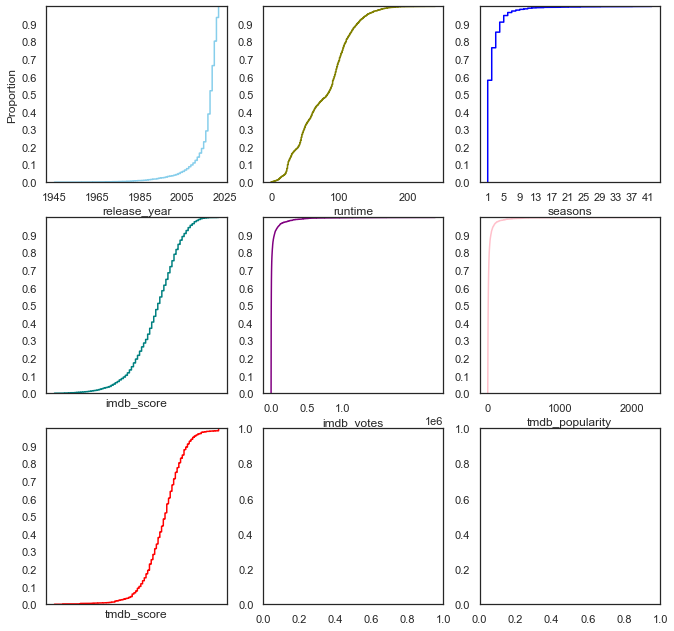

In [151]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.ecdfplot(data=Netflix_Data, x="release_year", color="skyblue", ax=axs[0, 0])
p1.set_xticks( range(int(Netflix_Data['release_year'].min()) , int(Netflix_Data['release_year'].max()+20) , 20) )
p1.set_yticks( np.arange(0, 1, 0.1)  )

p2 = sns.ecdfplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
p2.set_xticks( range(int(Netflix_Data['runtime'].min()) , int(Netflix_Data['runtime'].max()) , 100) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p3 = sns.ecdfplot(data=Netflix_Data, x="seasons", color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
p3.set_xticks( range(int(Netflix_Data['seasons'].min()) , int(Netflix_Data['seasons'].max()) , 4) )
p3.set_yticks( np.arange(0, 1, 0.1)  )

p4 = sns.ecdfplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
p4.set_xticks( range(int(Netflix_Data['imdb_score'].min()) , int(Netflix_Data['imdb_score'].max()) , 300) )
p4.set_yticks( np.arange(0, 1, 0.1)  )

p5 = sns.ecdfplot(data=Netflix_Data, x="imdb_votes", color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
p5.set_xticks( range(int(Netflix_Data['imdb_votes'].min()) , int(Netflix_Data['imdb_votes'].max()/2) , 500000) )
p5.set_yticks( np.arange(0, 1, 0.1)  )

p6 = sns.ecdfplot(data=Netflix_Data, x="tmdb_popularity", color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
p6.set_xticks( range(int(Netflix_Data['tmdb_popularity'].min()) , int(Netflix_Data['tmdb_popularity'].max()+1) , 1000) )
p6.set_yticks( np.arange(0, 1, 0.1)  )
 
p7 = sns.ecdfplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 50) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

fig.savefig('p3.png', format='png', dpi=1200)

plt.show()

## Analisis con  variables cuantitativas recortadas (trimmed)

In [152]:
def Trimmed_Outliers(df, variable_name):

    Q1 = df[variable_name].quantile(q=0.25)
    Q3 = df[variable_name].quantile(q=0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5*IQR

    lower_bound = Q1 - 1.5*IQR

    variable_trimmed = df.loc[ ( df[variable_name] >= lower_bound ) &  ( df[variable_name] <= upper_bound ) , variable_name ]

    return(variable_trimmed)

In [153]:
n_outliers = []
n_not_outliers = []

Quantitative_columns = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

for i in Quantitative_columns :

    n_outliers.append( Netflix_Data[i].count() - Trimmed_Outliers( Netflix_Data, i ).count() )

    n_not_outliers.append( Trimmed_Outliers( Netflix_Data, i ).count() )


df_outliers = pd.DataFrame({'Quantitative_columns':Quantitative_columns , 'n_outliers':n_outliers , 'n_not_outliers':n_not_outliers})

df_outliers['prop_outliers'] = df_outliers['n_outliers'] / (df_outliers['n_outliers'] + df_outliers['n_not_outliers'])

In [154]:
df_outliers

,Quantitative_columns,n_outliers,n_not_outliers,prop_outliers
0,release_year,574,5276,0.098120
1,runtime,10,5840,0.001709
2,seasons,309,1797,0.146724
3,imdb_score,89,5279,0.016580
4,imdb_votes,820,4532,0.153214
5,tmdb_popularity,661,5098,0.114777
6,tmdb_score,155,5384,0.027983


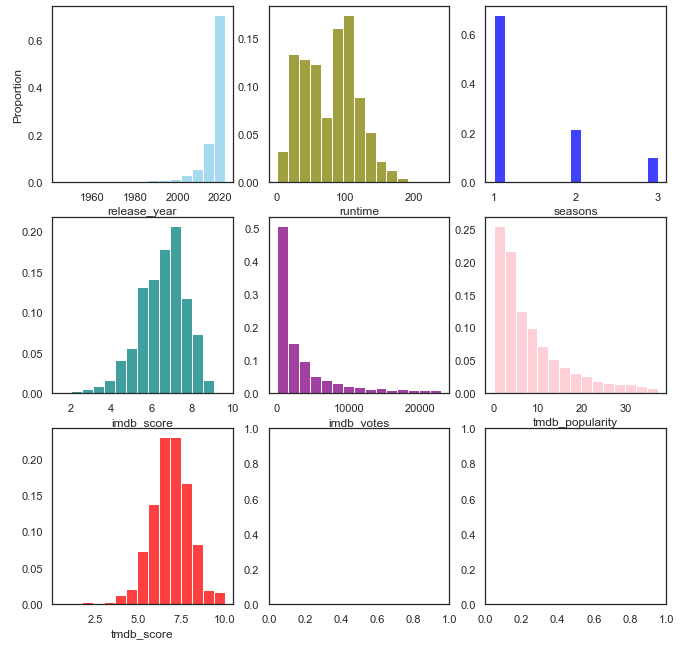

In [155]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue", ax=axs[0, 0])
 

p2 = sns.histplot(data=Netflix_Data, x="runtime", stat="proportion", bins=15, color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')


p3 = sns.histplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'seasons')) , x="seasons", stat="proportion", bins=15, color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
p3.set_xticks( [1,2,3] )


p4 = sns.histplot(data=Netflix_Data, x="imdb_score", stat="proportion", bins=15, color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')


p5 = sns.histplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'imdb_votes')) , x="imdb_votes", stat="proportion", bins=15, color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')


p6 = sns.histplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'tmdb_popularity')), x="tmdb_popularity", stat="proportion", bins=15, color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
 
 
p7 = sns.histplot(data=Netflix_Data, x="tmdb_score", stat="proportion", bins=15, color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')


plt.show()

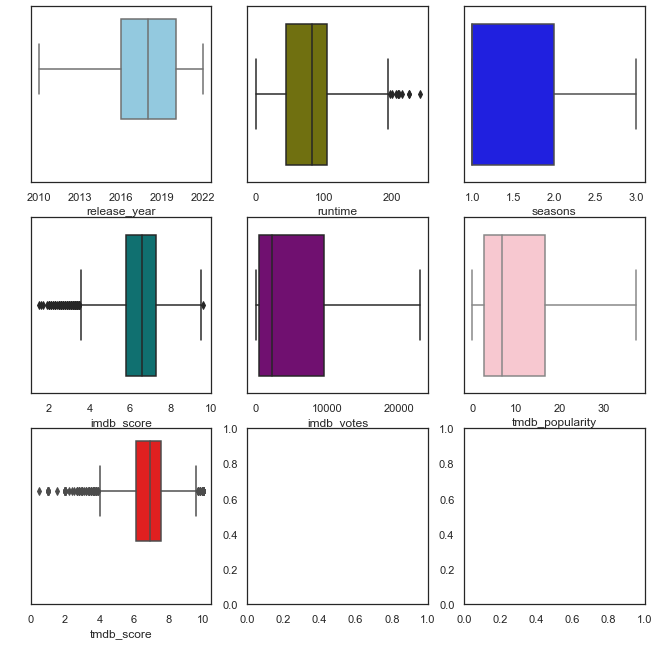

In [156]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue", showfliers = False, ax=axs[0, 0])
p1.axes.set(xlabel='release_year', ylabel=' ')
p1.set_xticks( range(  2010 , 2024, 3) )
p1.set_yticks( np.arange(0, 1, 0.1) )

p2 = sns.boxplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')

p3 = sns.boxplot(data=Netflix_Data, x="seasons", color="blue", showfliers = False, ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')

p4 = sns.boxplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')


p5 = sns.boxplot(data=Netflix_Data, x="imdb_votes", color="purple", showfliers = False , ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')

p6 = sns.boxplot(data=Netflix_Data, x="tmdb_popularity", color="pink", showfliers = False, ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')

p7 = sns.boxplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 2) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

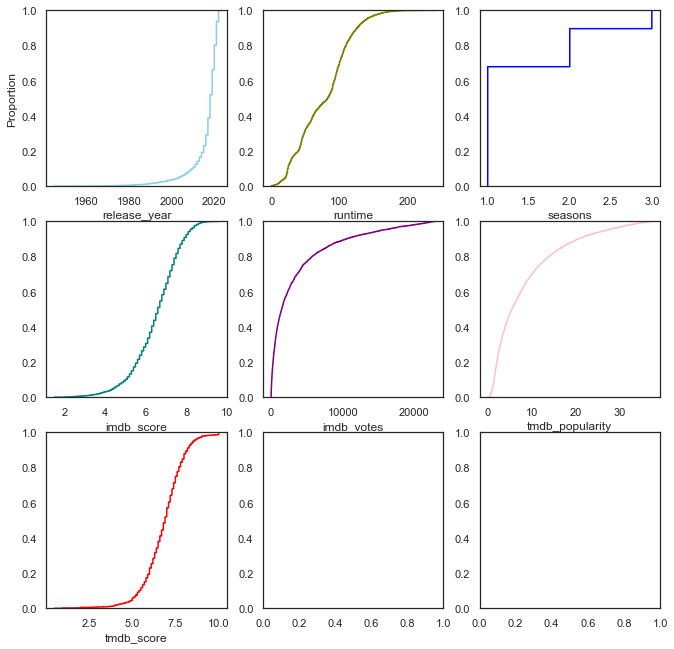

In [157]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.ecdfplot(data=Netflix_Data, x="release_year", color="skyblue", ax=axs[0, 0])
 

p2 = sns.ecdfplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
 

p3 = sns.ecdfplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'seasons')), x="seasons", color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
 

p4 = sns.ecdfplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
 

p5 = sns.ecdfplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'imdb_votes')) , x="imdb_votes", color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
 

p6 = sns.ecdfplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'tmdb_popularity')) , x="tmdb_popularity", color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
 
 
p7 = sns.ecdfplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
 

plt.show()

Variables categoricas

type, age_certification , genres, production_countries

In [158]:
Netflix_Data.type.unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [159]:
proportion_Movie = len( Netflix_Data.loc[ Netflix_Data['type']=='MOVIE' , :] ) / len(Netflix_Data)
proportion_Show = len( Netflix_Data.loc[ Netflix_Data['type']=='SHOW' , :] ) / len(Netflix_Data)

In [160]:
Netflix_Data['proportion_type'] = 0


for i in range(0, len(Netflix_Data)):

    if Netflix_Data['type'][i] == 'MOVIE' :

        Netflix_Data['proportion_type'][i] = proportion_Movie

    else :

        Netflix_Data['proportion_type'][i] = proportion_Show

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22132\397022058.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_Data['proportion_type'][i] = proportion_Show


[Text(0.5, 0, 'type'), Text(0, 0.5, 'proportion')]

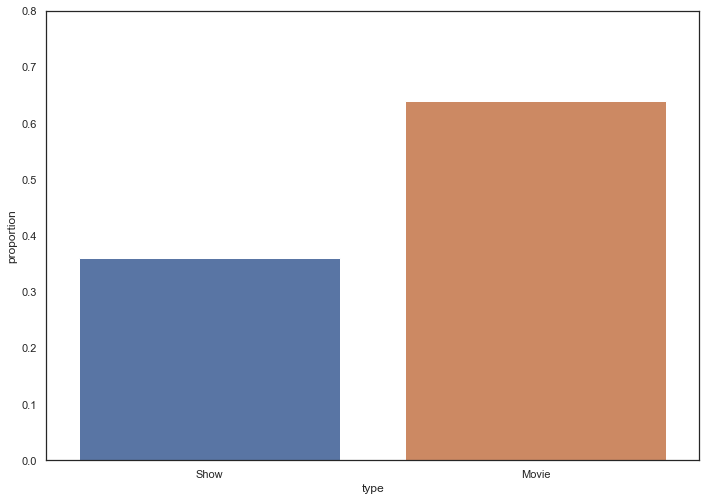

In [161]:
p1 = sns.barplot(x='type', y='proportion_type', data=Netflix_Data) 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['Show', 'Movie'])
p1.axes.set(xlabel='type', ylabel='proportion')

In [162]:
[ proportion_Movie , proportion_Show ]

[0.64, 0.36]

[Text(0.5, 0, 'type'), Text(0, 0.5, 'count')]

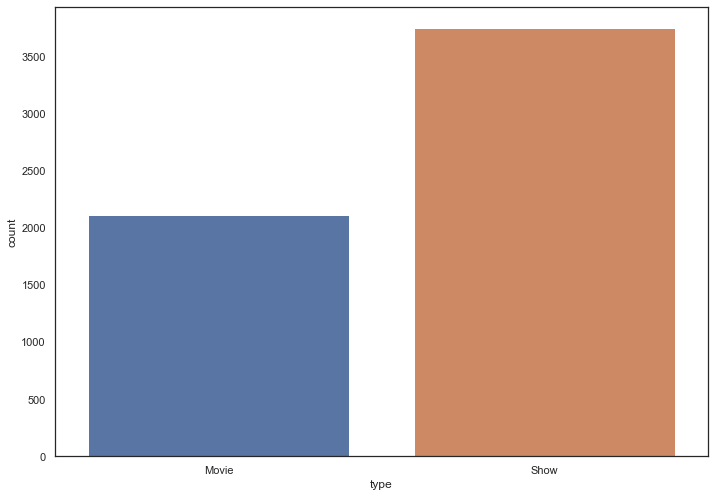

In [163]:
p1 = sns.countplot(x='type', data=Netflix_Data) 
p1.set_xticklabels(['Movie', 'Show'])
p1.axes.set(xlabel='type', ylabel='count')

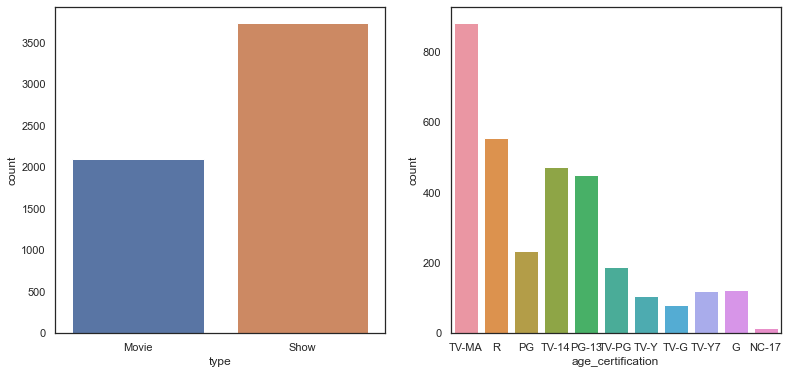

In [164]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

p1 = sns.countplot(x='type', data=Netflix_Data, ax=axs[0]) 
p1.set_xticklabels(['Movie', 'Show'])
p1.axes.set(xlabel='type', ylabel='count')

p2 = sns.countplot(x='age_certification', data=Netflix_Data, ax=axs[1]) 


fig.savefig('p4.png', format='png', dpi=1200)

plt.show()

# ANALISIS DETALLADO

In [165]:
import numpy as np

In [243]:
mean = Netflix_Data['release_year'].mean()
sd = Netflix_Data['release_year'].std()
min = Netflix_Data['release_year'].min()
Q25 = Netflix_Data['release_year'].quantile(0.25)
Q50 = Netflix_Data['release_year'].quantile(0.5)
Q75 = Netflix_Data['release_year'].quantile(0.75)
max = Netflix_Data['release_year'].max()
Oulier_upper_bound = Q75 + 1.5*(Q75 - Q25)
Oulier_lower_bound = Q25 - 1.5*(Q75 - Q25)

n_lower_outliers = (Netflix_Data['release_year'] < Oulier_lower_bound).sum()
n_upper_outliers = (Netflix_Data['release_year'] > Oulier_upper_bound).sum()

prop_NA = Netflix_Data['release_year'].isnull().sum() / len(Netflix_Data)
prop_not_NA = 1 - prop_NA

prop_lower_outliers = (Netflix_Data['release_year'] < Oulier_lower_bound).sum() / (prop_not_NA*len(Netflix_Data['release_year']))
prop_upper_outliers = (Netflix_Data['release_year'] > Oulier_upper_bound).sum() / (prop_not_NA*len(Netflix_Data['release_year']))

statistics_release_year = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max, 'Oulier_lower_bound':Oulier_lower_bound, 'Oulier_upper_bound':Oulier_upper_bound, 'n_lower_outliers':n_lower_outliers , 'n_upper_outliers':n_upper_outliers, 'prop_lower_outliers':prop_lower_outliers, 'prop_upper_outliers':prop_upper_outliers, 'prop_NA':prop_NA , 'prop_not_NA':prop_not_NA} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max', 'Oulier_lower_bound', 'Oulier_upper_bound', 'n_lower_outliers', 'n_upper_outliers', 'prop_lower_outliers', 'prop_upper_outliers', 'prop_NA' , 'prop_not_NA' ] , index=['release_year'])

In [167]:
statistics_release_year

,mean,sd,min,Q25,Q50,Q75,max,Oulier_lower_bound,Oulier_upper_bound,n_lower_outliers,n_upper_outliers,prop_lower_outliers,prop_upper_outliers,prop_NA,prop_not_NA
release_year,2016.417094,6.937726,1945,2016.0,2018.0,2020.0,2022,2010.0,2026.0,574,0,0.09812,0.0,0.0,1.0


Teniendo en cuenta los datos disponibles sobre títulos de Netflix:

- El año de lanzamiento medio es el 2016.42

- El año de lanzamiento mediano (cuantil 50%) es el 2018. Por lo que el 50% de los titulos han sido lanzados posteriormente al 2018

- La media es menor que la mediana debido a la presencia de outliers inferiores, en concreto, casi el 10% de los datos de `release_year` son outliers inferiores. 

- El cuantil 25% es 2016 , por lo que el 75% de los titulos analizados (la gran mayoria) tienen un año de lanzamiento posterior al 2016. 

- El cuantil 75% es 2020, por lo que la gran mayoria de titulos analizados tienen una fecha de lanzamiento igual o anterior al 2020, solo es 25% de ellos fueron lanzados posteriormente al 2020.

- De los dos anteriores puntos se deduce que el 50% de los titulos analizados han sido lanzados entre 2016 y 2020.

- El año de lanzamiento mas antiguo registrado (mínimo) es 1945

- El año de lanzamiento mas reciente registrado (máximo) es 2022

- La cota inferior de outliers es 2010. Por lo que todo titulo con año de lanzamiento inferior al 2010 será considerado un outlier.

- La cota superior de outliers es 2026. Por lo que todo titulo con año de lanzamiento superior al 2026 será considerado un outlier.

- El número de outliers inferiores es 574 , y la proporción sobre el total de datos disponibles de la variable (sin contar NA's) es 0.098, es decir, hay casi un 10% de outliers inferiores. Como ya se comentó esto es lo que tira a media hacia la abajo y hace que sea menro que la mediana, ya que la media se ve mas afectada por los valores extremos (outliers) que la mediana.

- El número de outliers superiores es 0, es decir, no hay. Esto se puede comprobar rapidamente viendo que el valor maximo (2022) es inferior a la cota superior de outliers (2026).

- La proporcion de valores faltantes presente en la variable `release_year` es 0 , es decir, no NA's en los datos disponibles de esta variable.

Tabla de frecuencias relativas para `release_year`

In [222]:
df_release_year = pd.DataFrame( Netflix_Data.groupby('release_year')['release_year'].count().reset_index(name='count') ) 

df_release_year['prop'] = df_release_year['count'] / len(Netflix_Data)

df_release_year['cum_prop'] = df_release_year['prop'].cumsum()

df_release_year.head(10)

,release_year,count,prop,cum_prop
0,1945,1,0.000171,0.000171
1,1954,2,0.000342,0.000513
2,1956,1,0.000171,0.000684
3,1958,1,0.000171,0.000855
4,1959,1,0.000171,0.001026
5,1960,1,0.000171,0.001197
6,1961,1,0.000171,0.001368
7,1963,1,0.000171,0.001538
8,1966,1,0.000171,0.001709
9,1967,2,0.000342,0.002051


In [223]:
df_release_year.sort_values(by='prop' , ascending=False).head(10)

,release_year,count,prop,cum_prop
59,2019,836,0.142906,0.662906
60,2020,814,0.139145,0.802051
61,2021,787,0.134530,0.936581
58,2018,773,0.132137,0.520000
57,2017,563,0.096239,0.387863
62,2022,371,0.063419,1.000000
56,2016,362,0.061880,0.291624
55,2015,223,0.038120,0.229744
54,2014,153,0.026154,0.191624
53,2013,135,0.023077,0.165470


Con esta tabla puede verse exactemente los cuantiles de la variable `release_year`, ya que los obtenidos con la función `quantile()` son una aproximación.

- 2013 es el cuantil 0.165 , por lo que solo un 16.5% de los titulos fueron lanzados antes del 2014 (en 2013 o antes).

- 2016 es el cuantil 0.29 , ya que el 29% de los titulos tienen un año de lanzamiento igual o anterior al 2016. Por lo que el 61% de los titulos han sido lanzados posteiormente al año 2016.

- 2018 es el cuantil 0.52 , por lo que el 52% de los titulos tienen un año de lanzamiento igual o anterior al 2018. Y casi la mitad de los titulos (48%) han sido lanzados posteriormente al 2018.

- 2020 es el cuantil 0.80 , por lo que la inmensa mayoria de los titulos (80%) han sido lanzados en un año previo al 2021  (esto es, en 2020 o anteriores).

- Además esta tabla nos permite saber cual es el año de lanzamiento más frecuente, el cual es el 2019. Es decir, la moda es 2019. 


Ahora vamos a generar un histograma para la variable `release_year`

In [238]:
sns.set_style("white")

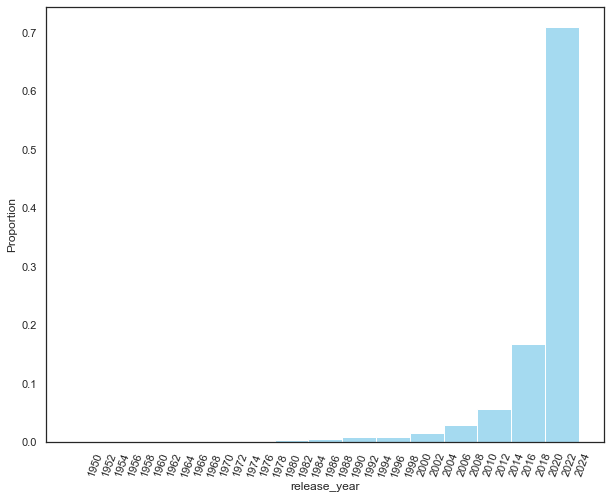

In [239]:

fig, ax = plt.subplots(figsize=(10, 8))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue")

p1.set_xticks( range(  1950 , 2026, 2))
ax.set_xticklabels(range( 1950 , 2026, 2), rotation=70, ha="right")

fig.savefig('p5_1.png', format='png', dpi=1200)

Hacemos la tabla anterior pero categorizando la variable `release_year` usando el mismo nº de intervalos que los usados en el histograma, así podremos comparar directamente el histograma con la tabla de frecuencias relativas, ya que ambos usan la funcion `cut()` para generar los intervalos.

In [254]:
Netflix_Data['release_year_recode']  = pd.cut(x=Netflix_Data['release_year'] , bins=15 )

df_release_year_recode = pd.DataFrame( Netflix_Data.groupby('release_year_recode')['release_year_recode'].count().reset_index(name='count') ) 

df_release_year_recode['prop'] = df_release_year_recode['count'] / len(Netflix_Data)

df_release_year_recode['cum_prop'] = df_release_year_recode['prop'].cumsum()

In [253]:
df_release_year_recode.sort_values(by='prop' , ascending=False).head(10)

,release_year_recode,count,prop,cum_prop
14,"(2016.867, 2022.0]",4144,0.708376,1.000000
13,"(2011.733, 2016.867]",980,0.167521,0.291624
12,"(2006.6, 2011.733]",322,0.055043,0.124103
11,"(2001.467, 2006.6]",168,0.028718,0.069060
10,"(1996.333, 2001.467]",82,0.014017,0.040342
9,"(1991.2, 1996.333]",50,0.008547,0.026325
8,"(1986.067, 1991.2]",45,0.007692,0.017778
7,"(1980.933, 1986.067]",24,0.004103,0.010085
6,"(1975.8, 1980.933]",13,0.002222,0.005983
5,"(1970.667, 1975.8]",8,0.001368,0.003761


Gracias a la tabla anterior tenemos información mas precisa sobre el histograma anterior, como por ejemplo:

- La barra más alta del histograma está asociada al intervalo [2017, 2022] y su altura es 0.708. Por tanto el 70.8% de titulos tienen un año de lanzamiento entre 2016 y 2022 (ambos incluidos).

- La segunda barra mas alta del histograma está asociada al intervalo [2012, 2016] y su altura es 0.168. Por tanto el 16.8% de los titulos fueron lanzados entre 2012 y 2016 (ambos incluidos).

- Por lo que el 87.6% (la inmensa mayoria) de los titulos fueron lanzados entre 2012 y 2022.

Podemos añadir lineas discontinuas verticales al anterior histograma para representar los valores de algunos de los estadisticos antes calculados, y asi representar de forma visual también esta información:

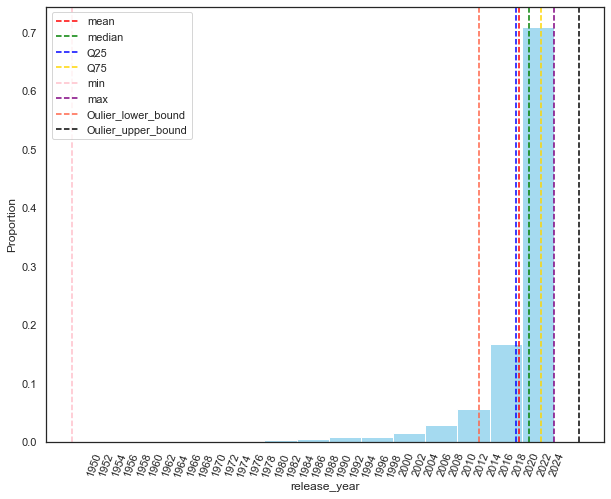

In [244]:
fig, ax = plt.subplots(figsize=(10, 8))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue")

plt.axvline(x=mean, c='red', linestyle='dashed', label="mean")
plt.axvline(x=Q50, c='green', linestyle='dashed', label="median")
plt.axvline(x=Q25, c='blue', linestyle='dashed', label="Q25")
plt.axvline(x=Q75, c='gold', linestyle='dashed', label="Q75")
plt.axvline(x=min, c='pink', linestyle='dashed', label="min")
plt.axvline(x=max, c='purple', linestyle='dashed', label="max")
plt.axvline(x=Oulier_lower_bound, c='tomato', linestyle='dashed', label="Oulier_lower_bound")
plt.axvline(x=Oulier_upper_bound, c='black', linestyle='dashed', label="Oulier_lower_bound")

p1.set_xticks( range(  1950 , 2026, 2) )
ax.set_xticklabels(range( 1950 , 2026, 2), rotation=90 , ha="right")

labels = ["mean", "median", "Q25", "Q75", "min", "max", "Oulier_lower_bound", "Oulier_upper_bound"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles, labels = labels, loc='upper left')


fig.savefig('p5_2.png', format='png', dpi=1200)

Ahora vamos a generar un box-plot para la variable `release_year`

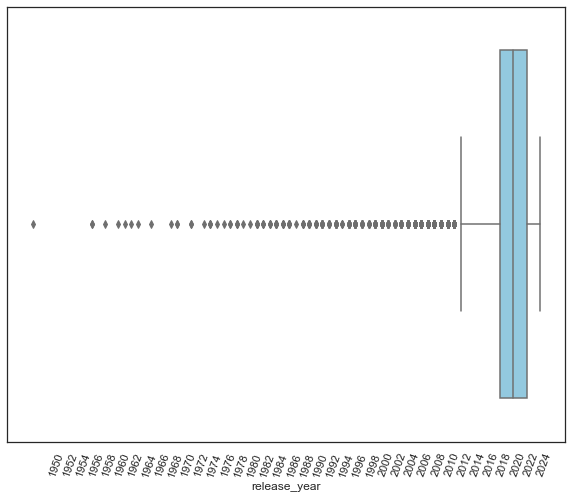

In [245]:
fig, ax = plt.subplots(figsize=(10, 8))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue")

p1.set_xticks( range(  1950 , 2026, 2) )
ax.set_xticklabels(range( 1950 , 2026, 2), rotation=70 , ha="right")

fig.savefig('p6_1.png', format='png', dpi=1200)

Se evidencia como hay una buena proporción de outliers inferiores. Y se ve como la mayoria de los titulos tienen un año de lanzamiento posterior al 2016.

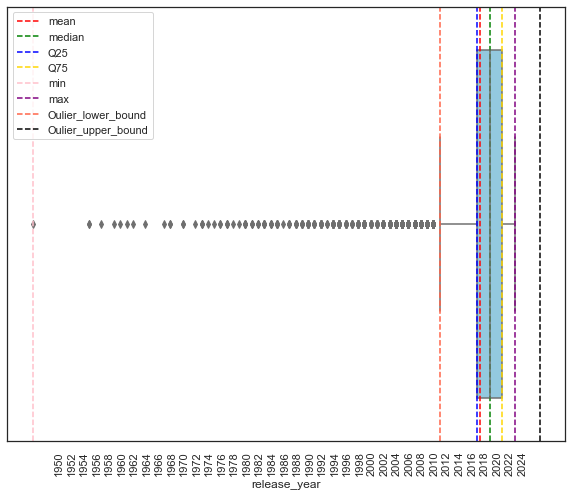

In [260]:
fig, ax = plt.subplots(figsize=(10, 8))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue")

plt.axvline(x=mean, c='red', linestyle='dashed', label="mean")
plt.axvline(x=Q50, c='green', linestyle='dashed', label="median")
plt.axvline(x=Q25, c='blue', linestyle='dashed', label="Q25")
plt.axvline(x=Q75, c='gold', linestyle='dashed', label="Q75")
plt.axvline(x=min, c='pink', linestyle='dashed', label="min")
plt.axvline(x=max, c='purple', linestyle='dashed', label="max")
plt.axvline(x=Oulier_lower_bound, c='tomato', linestyle='dashed', label="Oulier_lower_bound")
plt.axvline(x=Oulier_upper_bound, c='black', linestyle='dashed', label="Oulier_lower_bound")

p1.set_xticks( range(  1950 , 2026, 2) )
ax.set_xticklabels(range( 1950 , 2026, 2), rotation=90 , ha="right")

labels = ["mean", "median", "Q25", "Q75", "min", "max", "Oulier_lower_bound", "Oulier_upper_bound"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles, labels = labels, loc='upper left')

fig.savefig('p6_2.png', format='png', dpi=1200)

In [174]:
runtime_show = Netflix_Data.loc[ Netflix_Data['type']=='SHOW' , 'runtime']
runtime_movie = Netflix_Data.loc[ Netflix_Data['type']=='MOVIE' , 'runtime']

Netflix_Data['runtime_show'] = runtime_show
Netflix_Data['runtime_movie'] = runtime_movie

In [175]:
mean = Netflix_Data['runtime_show'].mean()
sd = Netflix_Data['runtime_show'].std()
min = Netflix_Data['runtime_show'].min()
Q25 = Netflix_Data['runtime_show'].quantile(0.25)
Q50 = Netflix_Data['runtime_show'].quantile(0.5)
Q75 = Netflix_Data['runtime_show'].quantile(0.75)
max = Netflix_Data['runtime_show'].max()
Outlier_upper_bound = Q75 + 1.5*(Q75 - Q25)
Outlier_lower_bound = Q25 - 1.5*(Q75 - Q25)

n_lower_outliers = (Netflix_Data['runtime_show'] < Outlier_lower_bound).sum()
n_upper_outliers = (Netflix_Data['runtime_show'] > Outlier_upper_bound).sum()

prop_NA = Netflix_Data['runtime_show'].isnull().sum() / len(Netflix_Data)
prop_not_NA = 1 - prop_NA

prop_lower_outliers = (Netflix_Data['runtime_show'] < Outlier_lower_bound).sum() / (prop_not_NA*len(Netflix_Data['runtime_show']))
prop_upper_outliers = (Netflix_Data['runtime_show'] > Outlier_upper_bound).sum() / (prop_not_NA*len(Netflix_Data['runtime_show']))

statistics_runtime_show = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max, 'Outlier_lower_bound':Outlier_lower_bound, 'Outlier_upper_bound':Outlier_upper_bound, 'n_lower_outliers':n_lower_outliers , 'n_upper_outliers':n_upper_outliers, 'prop_lower_outliers':prop_lower_outliers, 'prop_upper_outliers':prop_upper_outliers, 'prop_NA':prop_NA , 'prop_not_NA':prop_not_NA} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max', 'Outlier_lower_bound', 'Outlier_upper_bound', 'n_lower_outliers', 'n_upper_outliers', 'prop_lower_outliers', 'prop_upper_outliers', 'prop_NA' , 'prop_not_NA' ] , index=['runtime_show'])

In [176]:
statistics_runtime_show

,mean,sd,min,Q25,Q50,Q75,max,Outlier_lower_bound,Outlier_upper_bound,n_lower_outliers,n_upper_outliers,prop_lower_outliers,prop_upper_outliers,prop_NA,prop_not_NA
runtime_show,38.978158,17.626354,0.0,25.0,41.0,49.0,190.0,-11.0,85.0,0,19,0.0,0.009022,0.64,0.36


Teniendo en cuenta los datos disponibles sobre títulos de Netflix:

- El número medio de episodios de los shows analizados es aproximadamente 39

- El número mediano de episodios del los shows es 41 , por lo que el 50% se los shows analizados tienen menos de 41 episodios. 


- El cuantil 25% es 25 , por lo que el 75% de las shows analizados (la gran mayoria) tienen más de 25 episodios. 

- El cuantil 75% es 49, por lo que la gran mayoria de los shows analizados no tienen mas de 49 episodios, solo un 25% tienen más episodios.

- De los dos anteriores puntos se deduce que el 50% de los shows tienen entre 25 y 49 episiodios. 

- El nº maximo de episodios de un show registrado es 190 y el mínimo 0.

- La cota inferior de outliers es -11. 

- La cota superior de outliers es 85. Por lo que todo show con mas de 85 episodios será considerado un outlier.

- El número de outliers inferiores es 0, es decir, no hay.

- El número de outliers superiores es 19, y  y la proporción sobre el total de datos disponibles de la variable (sin contar NA's) es 0.009, es decir, apenas hay un 1% de outliers superiores.

- El porcentaje de valores faltantes presente en la variable `runtime_movie` es del 64%.

In [177]:
mean = Netflix_Data['runtime_movie'].mean()
sd = Netflix_Data['runtime_movie'].std()
min = Netflix_Data['runtime_movie'].min()
Q25 = Netflix_Data['runtime_movie'].quantile(0.25)
Q50 = Netflix_Data['runtime_movie'].quantile(0.5)
Q75 = Netflix_Data['runtime_movie'].quantile(0.75)
max = Netflix_Data['runtime_movie'].max()
Outlier_upper_bound = Q75 + 1.5*(Q75 - Q25)
Outlier_lower_bound = Q25 - 1.5*(Q75 - Q25)

n_lower_outliers = (Netflix_Data['runtime_movie'] < Outlier_lower_bound).sum()
n_upper_outliers = (Netflix_Data['runtime_movie'] > Outlier_upper_bound).sum()

prop_NA = Netflix_Data['runtime_movie'].isnull().sum() / len(Netflix_Data)
prop_not_NA = 1 - prop_NA

prop_lower_outliers = (Netflix_Data['runtime_movie'] < Outlier_lower_bound).sum() / (prop_not_NA*len(Netflix_Data['runtime_show']))
prop_upper_outliers = (Netflix_Data['runtime_movie'] > Outlier_upper_bound).sum() / (prop_not_NA*len(Netflix_Data['runtime_show']))

statistics_runtime_movie = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max, 'Outlier_lower_bound':Outlier_lower_bound, 'Outlier_upper_bound':Outlier_upper_bound, 'n_lower_outliers':n_lower_outliers , 'n_upper_outliers':n_upper_outliers, 'prop_lower_outliers':prop_lower_outliers, 'prop_upper_outliers':prop_upper_outliers, 'prop_NA':prop_NA , 'prop_not_NA':prop_not_NA} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max', 'Outlier_lower_bound', 'Outlier_upper_bound', 'n_lower_outliers', 'n_upper_outliers', 'prop_lower_outliers', 'prop_upper_outliers', 'prop_NA' , 'prop_not_NA' ] , index=['runtime_movie'])

In [178]:
statistics_runtime_movie

,mean,sd,min,Q25,Q50,Q75,max,Outlier_lower_bound,Outlier_upper_bound,n_lower_outliers,n_upper_outliers,prop_lower_outliers,prop_upper_outliers,prop_NA,prop_not_NA
runtime_movie,98.213675,30.64064,2.0,85.0,98.0,115.0,240.0,40.0,160.0,176,101,0.047009,0.026976,0.36,0.64


In [179]:
mean = Netflix_Data['runtime_movie'].mean()
sd = Netflix_Data['runtime_movie'].std()
min = Netflix_Data['runtime_movie'].min()
Q25 = Netflix_Data['runtime_movie'].quantile(0.25)
Q50 = Netflix_Data['runtime_movie'].quantile(0.5)
Q75 = Netflix_Data['runtime_movie'].quantile(0.75)
max = Netflix_Data['runtime_movie'].max()


statistics_runtime_movie= pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['runtime_movie'])

In [180]:
statistics_runtime_movie

,mean,sd,min,Q25,Q50,Q75,max
runtime_movie,98.213675,30.64064,2.0,85.0,98.0,115.0,240.0


In [181]:
mean = Netflix_Data['seasons'].mean()
sd = Netflix_Data['seasons'].std()
min = Netflix_Data['seasons'].min()
Q25 = Netflix_Data['seasons'].quantile(0.25)
Q50 = Netflix_Data['seasons'].quantile(0.5)
Q75 = Netflix_Data['seasons'].quantile(0.75)
max = Netflix_Data['seasons'].max()


statistics_seasons = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['seasons'])

In [182]:
statistics_seasons

,mean,sd,min,Q25,Q50,Q75,max
seasons,2.162868,2.689041,1.0,1.0,1.0,2.0,42.0


In [183]:
mean = Netflix_Data['imdb_score'].mean()
sd = Netflix_Data['imdb_score'].std()
min = Netflix_Data['imdb_score'].min()
Q25 = Netflix_Data['imdb_score'].quantile(0.25)
Q50 = Netflix_Data['imdb_score'].quantile(0.5)
Q75 = Netflix_Data['imdb_score'].quantile(0.75)
max = Netflix_Data['imdb_score'].max()


statistics_imdb_score = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['imdb_score'])

In [184]:
statistics_imdb_score

,mean,sd,min,Q25,Q50,Q75,max
imdb_score,6.510861,1.163826,1.5,5.8,6.6,7.3,9.6


In [185]:
mean = Netflix_Data['imdb_votes'].mean()
sd = Netflix_Data['imdb_votes'].std()
min = Netflix_Data['imdb_votes'].min()
Q25 = Netflix_Data['imdb_votes'].quantile(0.25)
Q50 = Netflix_Data['imdb_votes'].quantile(0.5)
Q75 = Netflix_Data['imdb_votes'].quantile(0.75)
max = Netflix_Data['imdb_votes'].max()


statistics_imdb_votes = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['imdb_votes'])

In [186]:
statistics_imdb_votes

,mean,sd,min,Q25,Q50,Q75,max
imdb_votes,23439.382474,95820.470909,5.0,516.75,2233.5,9494.0,2294231.0


In [187]:
mean = Netflix_Data['tmdb_popularity'].mean()
sd = Netflix_Data['tmdb_popularity'].std()
min = Netflix_Data['tmdb_popularity'].min()
Q25 = Netflix_Data['tmdb_popularity'].quantile(0.25)
Q50 = Netflix_Data['tmdb_popularity'].quantile(0.5)
Q75 = Netflix_Data['tmdb_popularity'].quantile(0.75)
max = Netflix_Data['tmdb_popularity'].max()


statistics_tmdb_popularity = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['tmdb_popularity'])

In [188]:
statistics_tmdb_popularity

,mean,sd,min,Q25,Q50,Q75,max
tmdb_popularity,22.637925,81.680263,0.009442,2.7285,6.821,16.59,2274.044


In [189]:
mean = Netflix_Data['tmdb_score'].mean()
sd = Netflix_Data['tmdb_score'].std()
min = Netflix_Data['tmdb_score'].min()
Q25 = Netflix_Data['tmdb_score'].quantile(0.25)
Q50 = Netflix_Data['tmdb_score'].quantile(0.5)
Q75 = Netflix_Data['tmdb_score'].quantile(0.75)
max = Netflix_Data['tmdb_score'].max()


statistics_tmdb_score = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['tmdb_score'])

In [190]:
statistics_tmdb_score

,mean,sd,min,Q25,Q50,Q75,max
tmdb_score,6.829175,1.170391,0.5,6.1,6.9,7.5375,10.0


In [191]:
df_age_certification = pd.DataFrame( Netflix_Data.groupby('age_certification')['age_certification'].count().reset_index(name='count') ) 

df_age_certification['prop'] = df_age_certification['count'] / len(Netflix_Data)

df_age_certification = df_age_certification.sort_values(by='prop' , ascending=False)

df_age_certification

,age_certification,count,prop
7,TV-MA,883,0.150940
4,R,556,0.095043
5,TV-14,474,0.081026
3,PG-13,451,0.077094
2,PG,233,0.039829
8,TV-PG,188,0.032137
0,G,124,0.021197
10,TV-Y7,120,0.020513
9,TV-Y,107,0.018291
6,TV-G,79,0.013504


In [192]:
df_genres = pd.DataFrame( Netflix_Data.groupby('genres')['genres'].count().reset_index(name='count') ) 

df_genres['prop'] = df_genres['count'] / len(Netflix_Data)

df_genres['cum_prop'] = df_genres['prop'].cumsum()

df_genres.head(10)

,genres,count,prop,cum_prop
0,"['action', 'animation', 'comedy', 'drama', 'fa...",1,0.000171,0.000171
1,"['action', 'animation', 'comedy', 'drama', 'fa...",2,0.000342,0.000513
2,"['action', 'animation', 'comedy', 'family', 'f...",2,0.000342,0.000855
3,"['action', 'animation', 'comedy', 'family', 'm...",1,0.000171,0.001026
4,"['action', 'animation', 'comedy', 'family']",4,0.000684,0.001709
5,"['action', 'animation', 'comedy', 'fantasy', '...",1,0.000171,0.001880
6,"['action', 'animation', 'comedy', 'fantasy']",1,0.000171,0.002051
7,"['action', 'animation', 'comedy', 'thriller', ...",1,0.000171,0.002222
8,"['action', 'animation', 'comedy']",1,0.000171,0.002393
9,"['action', 'animation', 'drama']",1,0.000171,0.002564


In [193]:
df_genres.sort_values(by='prop' , ascending=False)

,genres,count,prop,cum_prop
563,['comedy'],484,0.082735,0.339658
715,['documentation'],329,0.056239,0.494017
1061,['drama'],328,0.056068,0.736923
458,"['comedy', 'drama']",135,0.023077,0.202393
959,"['drama', 'romance']",124,0.021197,0.640855
...,...,...,...,...
720,"['drama', 'action', 'comedy', 'romance', 'thri...",1,0.000171,0.494872
719,"['drama', 'action', 'comedy', 'romance', 'crime']",1,0.000171,0.494701
718,"['drama', 'action', 'comedy', 'family']",1,0.000171,0.494530
717,"['drama', 'action', 'comedy', 'crime']",1,0.000171,0.494359


In [194]:
df_production_countries = pd.DataFrame( Netflix_Data.groupby('production_countries')['production_countries'].count().reset_index(name='count') ) 

df_production_countries['prop'] = df_production_countries['count'] / len(Netflix_Data)

df_production_countries['cum_prop'] = df_production_countries['prop'].cumsum()

df_production_countries.head(10)

,production_countries,count,prop,cum_prop
0,"['AE', 'FR', 'JO', 'LB', 'QA', 'PS']",1,0.000171,0.000171
1,"['AE', 'LB']",2,0.000342,0.000513
2,"['AE', 'US']",1,0.000171,0.000684
3,['AE'],11,0.001880,0.002564
4,"['AF', 'DE', 'PS']",1,0.000171,0.002735
5,['AF'],1,0.000171,0.002906
6,"['AR', 'CL']",1,0.000171,0.003077
7,"['AR', 'CO']",1,0.000171,0.003248
8,"['AR', 'DE', 'UY', 'ES']",1,0.000171,0.003419
9,"['AR', 'ES', 'UY']",1,0.000171,0.003590


In [195]:
df_production_countries.sort_values(by='prop' , ascending=False)

,production_countries,count,prop,cum_prop
438,['US'],1959,0.334872,0.949060
237,['IN'],599,0.102393,0.370769
264,['JP'],264,0.045128,0.431453
451,[],229,0.039145,1.000000
269,['KR'],222,0.037949,0.470598
...,...,...,...,...
167,"['FR', 'NL', 'SG']",1,0.000171,0.170427
166,"['FR', 'NL', 'GB', 'US']",1,0.000171,0.170256
165,"['FR', 'MX', 'ES']",1,0.000171,0.170085
164,"['FR', 'MX', 'CO']",1,0.000171,0.169915


In [196]:
df_seasons = pd.DataFrame( Netflix_Data.groupby('seasons')['seasons'].count().reset_index(name='count') ) 

n_shows = ((1-0.64)*len(Netflix_Data))

df_seasons['prop'] = df_seasons['count'] / n_shows

df_seasons['cum_prop'] = df_seasons['prop'].cumsum()

df_seasons.head(10)

,seasons,count,prop,cum_prop
0,1.0,1221,0.579772,0.579772
1,2.0,389,0.184710,0.764482
2,3.0,187,0.088794,0.853276
3,4.0,120,0.056980,0.910256
4,5.0,79,0.037512,0.947768
5,6.0,36,0.017094,0.964862
6,7.0,18,0.008547,0.973409
7,8.0,11,0.005223,0.978632
8,9.0,9,0.004274,0.982906
9,10.0,6,0.002849,0.985755


In [197]:
df_seasons.sort_values(by='prop' , ascending=False)

,seasons,count,prop,cum_prop
0,1.0,1221,0.579772,0.579772
1,2.0,389,0.184710,0.764482
2,3.0,187,0.088794,0.853276
3,4.0,120,0.056980,0.910256
4,5.0,79,0.037512,0.947768
5,6.0,36,0.017094,0.964862
6,7.0,18,0.008547,0.973409
7,8.0,11,0.005223,0.978632
8,9.0,9,0.004274,0.982906
10,11.0,8,0.003799,0.989554


In [198]:
intervals = [Netflix_Data['imdb_score'].min(), Netflix_Data['imdb_score'].quantile(0.25), Netflix_Data['imdb_score'].quantile(0.5) , Netflix_Data['imdb_score'].quantile(0.75) , Netflix_Data['imdb_score'].max()]

Netflix_Data['imdb_score_recode']  = pd.cut(x=Netflix_Data['imdb_score'] , bins=intervals )

df_imdb_score_recode = pd.DataFrame( Netflix_Data.groupby('imdb_score_recode')['imdb_score_recode'].count().reset_index(name='count') ) 

df_imdb_score_recode['prop'] = df_imdb_score_recode['count'] / len(Netflix_Data)

df_imdb_score_recode['cum_prop'] = df_imdb_score_recode['prop'].cumsum()

df_imdb_score_recode.head(10)

,imdb_score_recode,count,prop,cum_prop
0,"(1.5, 5.8]",1414,0.241709,0.241709
1,"(5.8, 6.6]",1328,0.227009,0.468718
2,"(6.6, 7.3]",1302,0.222564,0.691282
3,"(7.3, 9.6]",1323,0.226154,0.917436


In [199]:
df_imdb_score_recode.sort_values(by='prop' , ascending=False)

,imdb_score_recode,count,prop,cum_prop
0,"(1.5, 5.8]",1414,0.241709,0.241709
1,"(5.8, 6.6]",1328,0.227009,0.468718
3,"(7.3, 9.6]",1323,0.226154,0.917436
2,"(6.6, 7.3]",1302,0.222564,0.691282


In [200]:
intervals = [Netflix_Data['imdb_votes'].min(), Netflix_Data['imdb_votes'].quantile(0.25), Netflix_Data['imdb_votes'].quantile(0.5) , Netflix_Data['imdb_votes'].quantile(0.75) , Netflix_Data['imdb_votes'].max()]

Netflix_Data['imdb_votes_recode']  = pd.cut(x=Netflix_Data['imdb_votes'] , bins=intervals )

df_imdb_votes_recode = pd.DataFrame( Netflix_Data.groupby('imdb_votes_recode')['imdb_votes_recode'].count().reset_index(name='count') ) 

df_imdb_votes_recode['prop'] = df_imdb_votes_recode['count'] / len(Netflix_Data)

df_imdb_votes_recode['cum_prop'] = df_imdb_votes_recode['prop'].cumsum()

df_imdb_votes_recode.head(10)

,imdb_votes_recode,count,prop,cum_prop
0,"(5.0, 516.75]",1332,0.227692,0.227692
1,"(516.75, 2233.5]",1338,0.228718,0.456410
2,"(2233.5, 9494.0]",1338,0.228718,0.685128
3,"(9494.0, 2294231.0]",1338,0.228718,0.913846


In [201]:
df_imdb_votes_recode.sort_values(by='prop' , ascending=False)

,imdb_votes_recode,count,prop,cum_prop
1,"(516.75, 2233.5]",1338,0.228718,0.456410
2,"(2233.5, 9494.0]",1338,0.228718,0.685128
3,"(9494.0, 2294231.0]",1338,0.228718,0.913846
0,"(5.0, 516.75]",1332,0.227692,0.227692


In [202]:
intervals = [Netflix_Data['tmdb_popularity'].min(), Netflix_Data['tmdb_popularity'].quantile(0.25), Netflix_Data['tmdb_popularity'].quantile(0.5) , Netflix_Data['tmdb_popularity'].quantile(0.75) , Netflix_Data['tmdb_popularity'].max()]

Netflix_Data['tmdb_popularity_recode']  = pd.cut(x=Netflix_Data['tmdb_popularity'] , bins=intervals )

df_tmdb_popularity_recode = pd.DataFrame( Netflix_Data.groupby('tmdb_popularity_recode')['tmdb_popularity_recode'].count().reset_index(name='count') ) 

df_tmdb_popularity_recode['prop'] = df_tmdb_popularity_recode['count'] / len(Netflix_Data)

df_tmdb_popularity_recode['cum_prop'] = df_tmdb_popularity_recode['prop'].cumsum()

df_tmdb_popularity_recode.head(10)

,tmdb_popularity_recode,count,prop,cum_prop
0,"(0.00944, 2.728]",1439,0.245983,0.245983
1,"(2.728, 6.821]",1440,0.246154,0.492137
2,"(6.821, 16.59]",1439,0.245983,0.738120
3,"(16.59, 2274.044]",1440,0.246154,0.984274


In [203]:
df_tmdb_popularity_recode.sort_values(by='prop' , ascending=False)

,tmdb_popularity_recode,count,prop,cum_prop
1,"(2.728, 6.821]",1440,0.246154,0.492137
3,"(16.59, 2274.044]",1440,0.246154,0.984274
0,"(0.00944, 2.728]",1439,0.245983,0.245983
2,"(6.821, 16.59]",1439,0.245983,0.738120


In [204]:
intervals = [Netflix_Data['tmdb_score'].min(), Netflix_Data['tmdb_score'].quantile(0.25), Netflix_Data['tmdb_score'].quantile(0.5) , Netflix_Data['tmdb_score'].quantile(0.75) , Netflix_Data['tmdb_score'].max()]

Netflix_Data['tmdb_score_recode']  = pd.cut(x=Netflix_Data['tmdb_score'] , bins=intervals )

df_tmdb_score_recode = pd.DataFrame( Netflix_Data.groupby('tmdb_score_recode')['tmdb_score_recode'].count().reset_index(name='count') ) 

df_tmdb_score_recode['prop'] = df_tmdb_score_recode['count'] / len(Netflix_Data)

df_tmdb_score_recode['cum_prop'] = df_tmdb_score_recode['prop'].cumsum()

df_tmdb_score_recode.head(10)

,tmdb_score_recode,count,prop,cum_prop
0,"(0.5, 6.1]",1400,0.239316,0.239316
1,"(6.1, 6.9]",1472,0.251624,0.490940
2,"(6.9, 7.538]",1281,0.218974,0.709915
3,"(7.538, 10.0]",1385,0.236752,0.946667


In [205]:
df_tmdb_score_recode.sort_values(by='prop' , ascending=False)

,tmdb_score_recode,count,prop,cum_prop
1,"(6.1, 6.9]",1472,0.251624,0.490940
0,"(0.5, 6.1]",1400,0.239316,0.239316
3,"(7.538, 10.0]",1385,0.236752,0.946667
2,"(6.9, 7.538]",1281,0.218974,0.709915


In [206]:
intervals = [Netflix_Data['runtime_show'].min(), Netflix_Data['runtime_show'].quantile(0.25), Netflix_Data['runtime_show'].quantile(0.5) , Netflix_Data['runtime_show'].quantile(0.75) , Netflix_Data['runtime_show'].max()]

Netflix_Data['runtime_show_recode']  = pd.cut(x=Netflix_Data['runtime_show'] , bins=intervals )

df_runtime_show = pd.DataFrame( Netflix_Data.groupby('runtime_show_recode')['runtime_show_recode'].count().reset_index(name='count') ) 

n_show = len(Netflix_Data.loc[Netflix_Data['type']=='SHOW', ])

df_runtime_show['prop'] = df_runtime_show['count'] / n_show

df_runtime_show['cum_prop'] = df_runtime_show['prop'].cumsum()

df_runtime_show.head(10)

,runtime_show_recode,count,prop,cum_prop
0,"(0.0, 25.0]",571,0.271130,0.271130
1,"(25.0, 41.0]",474,0.225071,0.496201
2,"(41.0, 49.0]",536,0.254511,0.750712
3,"(49.0, 190.0]",511,0.242640,0.993352


In [207]:
Netflix_Data['runtime_show_recode']  = pd.cut(x=Netflix_Data['runtime_show'] , bins=8 )

df_runtime_show = pd.DataFrame( Netflix_Data.groupby('runtime_show_recode')['runtime_show_recode'].count().reset_index(name='count') ) 

n_show = len(Netflix_Data.loc[Netflix_Data['type']=='SHOW', ])

df_runtime_show['prop'] = df_runtime_show['count'] / n_show

df_runtime_show['cum_prop'] = df_runtime_show['prop'].cumsum()

df_runtime_show.head(10)

,runtime_show_recode,count,prop,cum_prop
0,"(-0.19, 23.75]",382,0.181387,0.181387
1,"(23.75, 47.5]",1108,0.526116,0.707502
2,"(47.5, 71.25]",556,0.264008,0.971510
3,"(71.25, 95.0]",52,0.024691,0.996201
4,"(95.0, 118.75]",4,0.001899,0.998101
5,"(118.75, 142.5]",2,0.000950,0.999050
6,"(142.5, 166.25]",0,0.000000,0.999050
7,"(166.25, 190.0]",2,0.000950,1.000000


In [208]:
intervals = [Netflix_Data['runtime_movie'].min(), Netflix_Data['runtime_movie'].quantile(0.25), Netflix_Data['runtime_movie'].quantile(0.5) , Netflix_Data['runtime_movie'].quantile(0.75) , Netflix_Data['runtime_movie'].max()]

Netflix_Data['runtime_movie_recode']  = pd.cut(x=Netflix_Data['runtime_movie'] , bins=intervals )

df_runtime_movie_recode= pd.DataFrame( Netflix_Data.groupby('runtime_movie_recode')['runtime_movie_recode'].count().reset_index(name='count') ) 

n_movie = len(Netflix_Data.loc[Netflix_Data['type']=='MOVIE', ])

df_runtime_movie_recode['prop'] = df_runtime_movie_recode['count'] / n_movie

df_runtime_movie_recode['cum_prop'] = df_runtime_movie_recode['prop'].cumsum()

df_runtime_movie_recode.head(10)

,runtime_movie_recode,count,prop,cum_prop
0,"(2.0, 85.0]",952,0.254274,0.254274
1,"(85.0, 98.0]",942,0.251603,0.505876
2,"(98.0, 115.0]",944,0.252137,0.758013
3,"(115.0, 240.0]",905,0.241720,0.999733


In [209]:
Netflix_Data['runtime_movie_recode']  = pd.cut(x=Netflix_Data['runtime_movie'] , bins=6 )

df_runtime_movie_recode= pd.DataFrame( Netflix_Data.groupby('runtime_movie_recode')['runtime_movie_recode'].count().reset_index(name='count') ) 

n_movie = len(Netflix_Data.loc[Netflix_Data['type']=='MOVIE', ])

df_runtime_movie_recode['prop'] = df_runtime_movie_recode['count'] / n_movie

df_runtime_movie_recode['cum_prop'] = df_runtime_movie_recode['prop'].cumsum()

df_runtime_movie_recode.head(10)

,runtime_movie_recode,count,prop,cum_prop
0,"(1.762, 41.667]",187,0.049947,0.049947
1,"(41.667, 81.333]",621,0.165865,0.215812
2,"(81.333, 121.0]",2238,0.597756,0.813568
3,"(121.0, 160.667]",597,0.159455,0.973024
4,"(160.667, 200.333]",93,0.024840,0.997863
5,"(200.333, 240.0]",8,0.002137,1.000000
